# Import packages and database

In [1]:
import pandas as pd
import numpy as np
import biogeme.database as db
import biogeme.biogeme as bio
import biogeme.segmentation as seg
from biogeme.expressions import Beta, Variable, Derive, exp
from biogeme import models
from biogeme import results as res
from biogeme.expressions import DefineVariable, log
from collections import namedtuple

data_file ='https://raw.githubusercontent.com/GustavePellier/MMOB/main/lpmc19.dat'
LPMC = pd.read_csv(data_file, sep='\t')
LPMC

database = db.Database('LPMC', LPMC)
all_results = {}

# Model 0

We calculate the total public transport duration and the total driving cost

In [2]:
LPMC["dur_pt"]= LPMC["dur_pt_access"] + LPMC["dur_pt_rail"] + LPMC["dur_pt_bus"] + LPMC["dur_pt_int"] 
LPMC["cost_drive"] = LPMC["cost_driving_ccharge"] + LPMC["cost_driving_fuel"]

Some variables are created with the columns that seem to be useful

In [3]:
travel_mode=Variable('travel_mode')

dur_pt_access=Variable('dur_pt_access')
dur_pt_rail=Variable('dur_pt_rail')
dur_pt_bus=Variable('dur_pt_bus')
dur_pt_int=Variable('dur_pt_int')

pt_interchanges=Variable('pt_interchanges')

cost_driving_fuel=Variable('cost_driving_fuel')
cost_driving_ccharge=Variable('cost_driving_ccharge')
cost_drive=Variable('cost_drive')
cost_pt=Variable('cost_transit')

time_walk=Variable('dur_walking')
time_cycle=Variable('dur_cycling')
time_pt=Variable('dur_pt')
time_drive=Variable('dur_driving')

female=Variable('female')
age=Variable('age')

There are 4 different travel mode, we will thus build a model with 4 utility functions, we create 3 alternative specific constant, a generic parameter for travel time and a generic parameter for cost

In [4]:
asc_cycle = Beta('asc_cycle', 0, None, None, 0)
asc_pt = Beta('asc_pt', 0, None, None, 0)
asc_drive = Beta('asc_drive', 0, None, None, 0)
beta_cost = Beta('beta_cost', 0, None, None, 0)
beta_time = Beta('beta_time', 0, None, None, 0)

Utility functions creation

In [5]:
v_walk_model0= beta_time * time_walk  
v_cycle_model0= asc_cycle + beta_time * time_cycle 
v_pt_model0= asc_pt + beta_time * time_pt + beta_cost * cost_pt
v_drive_model0= asc_drive + beta_time * time_drive + beta_cost * cost_drive

availability of each mode, all available here

In [6]:
av = {1: 1, 2: 1, 3: 1, 4:1}

The estimation results (parameter values, t-tests or p-values, null and final log likelihoods)

In [7]:
V_model0 = {1: v_walk_model0 , 2: v_cycle_model0, 3: v_pt_model0, 4: v_drive_model0}
logprob_model0 = models.loglogit(V_model0, av, travel_mode)
biogeme_model0 = bio.BIOGEME(database, logprob_model0)
biogeme_model0.modelName = 'Model_0'
all_results['Model0'] = biogeme_model0.estimate()
results_generic = biogeme_model0.estimate()
results_generic.getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
asc_cycle,-3.878619,0.107672,-36.022418,0.0
asc_drive,-1.295191,0.080505,-16.088354,0.0
asc_pt,-0.503354,0.054123,-9.300119,0.0
beta_cost,-0.193629,0.013958,-13.871889,0.0
beta_time,-5.495527,0.208596,-26.345342,0.0


In [8]:
res.compile_estimation_results(all_results)

(                                         Model0
 Number of estimated parameters                5
 Sample size                                5000
 Final log likelihood               -4587.818071
 Akaike Information Criterion        9185.636142
 Bayesian Information Criterion      9218.222108
 asc_cycle (t-test)                 -3.88  (-36)
 asc_drive (t-test)                -1.3  (-16.1)
 asc_pt (t-test)                  -0.503  (-9.3)
 beta_cost (t-test)              -0.194  (-13.9)
 beta_time (t-test)                -5.5  (-26.3),
 {'Model0': 'Model0'})

In [9]:
print("Null Loglikelihood : ")
biogeme_model0.calculateNullLoglikelihood(av)

Null Loglikelihood : 


-6931.471805599917

# Model 1

We choose to do a specification for the time attribute, the cost stays generic in this model. Therefore we obtain a beta_time parameter for each transportation mode. 

In [10]:
beta_time_walk = Beta('beta_time_walk', 0, None, None, 0)
beta_time_cycle = Beta('beta_time_cycle', 0, None, None, 0)
beta_time_pt = Beta('beta_time_pt', 0, None, None, 0)
beta_time_drive = Beta('beta_time_drive', 0, None, None, 0)

The utility functions are rewritten with the new parameters :

In [11]:
v_walk_model1= beta_time_walk * time_walk  
v_cycle_model1= asc_cycle + beta_time_cycle * time_cycle 
v_pt_model1= asc_pt + beta_time_pt * time_pt + beta_cost * cost_pt
v_drive_model1= asc_drive + beta_time_drive * time_drive + beta_cost * cost_drive

The results are computed (parameter values, t-tests or p-values, null and final log likelihoods)

In [12]:
V_model1 = {1: v_walk_model1 , 2: v_cycle_model1, 3: v_pt_model1, 4: v_drive_model1}
logprob_model1 = models.loglogit(V_model1, av, travel_mode)
biogeme_model1 = bio.BIOGEME(database, logprob_model1)
biogeme_model1.modelName = 'Model_1'
all_results['Model1'] = biogeme_model1.estimate()
results_specific_time = biogeme_model1.estimate()
results_specific_time.getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
asc_cycle,-4.847244,0.202571,-23.928591,0.0
asc_drive,-1.969893,0.137931,-14.281745,0.0
asc_pt,-2.337215,0.139508,-16.753254,0.0
beta_cost,-0.182008,0.016087,-11.314053,0.0
beta_time_cycle,-5.312453,0.462002,-11.498764,0.0
beta_time_drive,-6.474309,0.378989,-17.083106,0.0
beta_time_pt,-3.538621,0.250656,-14.117425,0.0
beta_time_walk,-8.430841,0.418999,-20.121396,0.0


In [13]:
res.compile_estimation_results(all_results)

(                                         Model0           Model1
 Number of estimated parameters                5                8
 Sample size                                5000             5000
 Final log likelihood               -4587.818071     -4275.496542
 Akaike Information Criterion        9185.636142      8566.993084
 Bayesian Information Criterion      9218.222108      8619.130629
 asc_cycle (t-test)                 -3.88  (-36)   -4.85  (-23.9)
 asc_drive (t-test)                -1.3  (-16.1)   -1.97  (-14.3)
 asc_pt (t-test)                  -0.503  (-9.3)   -2.34  (-16.8)
 beta_cost (t-test)              -0.194  (-13.9)  -0.182  (-11.3)
 beta_time (t-test)                -5.5  (-26.3)                 
 beta_time_cycle (t-test)                          -5.31  (-11.5)
 beta_time_drive (t-test)                          -6.47  (-17.1)
 beta_time_pt (t-test)                             -3.54  (-14.1)
 beta_time_walk (t-test)                           -8.43  (-20.1),
 {'Model0

In [14]:
biogeme_model1.calculateNullLoglikelihood(av)

-6931.471805599917

We compare the 2 models with the likelihood ratio test because model 0 is a reduction of model 1.  

In [15]:
results_specific_time.likelihood_ratio_test(results_generic, 0.05)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=624.6430584290811, threshold=7.814727903251179)

The model 1 is then our model pref as they are significantly different 

# Model 2

Using Model 1 as the base model, we choose to study how gender interact with the
ASCs and the alternative attributes. 

Lets start by segmenting the population by gender

In [16]:
gender_segmentation = seg.DiscreteSegmentationTuple(variable=female, mapping={1: 'female', 0: 'male'})

### ASC segmentation

In [17]:
asc_cycle = Beta('asc_cycle', 0, None, None, 0)
segmented_asc_cycle = seg.Segmentation(asc_cycle,[gender_segmentation]).segmented_beta()

asc_pt = Beta('asc_pt', 0, None, None, 0)
segmented_asc_pt = seg.Segmentation(asc_pt,[gender_segmentation]).segmented_beta()

asc_drive = Beta('asc_drive', 0, None, None, 0)
segmented_asc_drive = seg.Segmentation(asc_drive,[gender_segmentation]).segmented_beta()

We redefine the value function of the 4 alternatives, introducing the segmented ASC and the segmented cost attribute

In [18]:
v_walk_model2= beta_time_walk * time_walk  
v_cycle_model2= segmented_asc_cycle + beta_time_cycle * time_cycle 
v_pt_model2= segmented_asc_pt + beta_time_pt * time_pt + beta_cost * cost_pt
v_drive_model2= segmented_asc_drive + beta_time_drive * time_drive + beta_cost * cost_drive

We can compute the result of the new model

In [19]:
V_model2 = {1: v_walk_model2 , 2: v_cycle_model2, 3: v_pt_model2, 4: v_drive_model2}
logprob_model2 = models.loglogit(V_model2, av, travel_mode)
biogeme_model2 = bio.BIOGEME(database, logprob_model2)
biogeme_model2.modelName = 'Model_2'
all_results['Model2'] = biogeme_model2.estimate()
results_segmented_gender = biogeme_model2.estimate()
results_segmented_gender.getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
asc_cycle,-5.454930,0.253358,-21.530508,0.000000e+00
asc_cycle_male,1.051942,0.208777,5.038603,4.689426e-07
asc_drive,-1.893652,0.144299,-13.123080,0.000000e+00
asc_drive_male,-0.197936,0.095253,-2.078005,3.770893e-02
asc_pt,-2.208482,0.146369,-15.088403,0.000000e+00
asc_pt_male,-0.333138,0.099553,-3.346326,8.189020e-04
beta_cost,-0.182829,0.016154,-11.317871,0.000000e+00
beta_time_cycle,-5.580963,0.473150,-11.795344,0.000000e+00
beta_time_drive,-6.487905,0.380054,-17.071030,0.000000e+00
beta_time_pt,-3.526973,0.251404,-14.029132,0.000000e+00


In [20]:
biogeme_model2.calculateNullLoglikelihood(av)

-6931.471805599917

### Cost segmentation

And its interaction on the cost attribute in the car and public transport alternative.

In [21]:
beta_cost = Beta('beta_cost', 0, None, None, 0)
segmented_beta_cost = seg.Segmentation(beta_cost, [gender_segmentation]).segmented_beta()

In [22]:
v_walk_model2_2= beta_time_walk * time_walk  
v_cycle_model2_2= asc_cycle + beta_time_cycle * time_cycle 
v_pt_model2_2= asc_pt + beta_time_pt * time_pt + segmented_beta_cost * cost_pt
v_drive_model2_2= asc_drive + beta_time_drive * time_drive + segmented_beta_cost * cost_drive

We can compute the result of the new model

In [23]:
V_model2_2 = {1: v_walk_model2_2 , 2: v_cycle_model2_2, 3: v_pt_model2_2, 4: v_drive_model2_2}
logprob_model2_2 = models.loglogit(V_model2_2, av, travel_mode)
biogeme_model2_2 = bio.BIOGEME(database, logprob_model2_2)
biogeme_model2_2.modelName = 'Model_2_2'
all_results['Model2_2'] = biogeme_model2_2.estimate()
results_segmented_gender_2 = biogeme_model2_2.estimate()
results_segmented_gender_2.getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
asc_cycle,-4.843794,0.202194,-23.956171,0.000000e+00
asc_drive,-1.971743,0.137733,-14.315671,0.000000e+00
asc_pt,-2.343140,0.139310,-16.819666,0.000000e+00
beta_cost,-0.151591,0.018749,-8.085484,6.661338e-16
beta_cost_male,-0.065394,0.031840,-2.053796,3.999542e-02
beta_time_cycle,-5.348639,0.459248,-11.646523,0.000000e+00
beta_time_drive,-6.483027,0.380414,-17.042043,0.000000e+00
beta_time_pt,-3.536892,0.250704,-14.107825,0.000000e+00
beta_time_walk,-8.435704,0.418411,-20.161287,0.000000e+00


In [24]:
biogeme_model2_2.calculateNullLoglikelihood(av)

-6931.471805599917

### Compiling all results from the different models

In [25]:
res.compile_estimation_results(all_results)

(                                         Model0           Model1  \
 Number of estimated parameters                5                8   
 Sample size                                5000             5000   
 Final log likelihood               -4587.818071     -4275.496542   
 Akaike Information Criterion        9185.636142      8566.993084   
 Bayesian Information Criterion      9218.222108      8619.130629   
 asc_cycle (t-test)                 -3.88  (-36)   -4.85  (-23.9)   
 asc_drive (t-test)                -1.3  (-16.1)   -1.97  (-14.3)   
 asc_pt (t-test)                  -0.503  (-9.3)   -2.34  (-16.8)   
 beta_cost (t-test)              -0.194  (-13.9)  -0.182  (-11.3)   
 beta_time (t-test)                -5.5  (-26.3)                    
 beta_time_cycle (t-test)                          -5.31  (-11.5)   
 beta_time_drive (t-test)                          -6.47  (-17.1)   
 beta_time_pt (t-test)                             -3.54  (-14.1)   
 beta_time_walk (t-test)          

### Likelihood ratio test to check if model_2 and model_2_2 are equivalent or not

In [26]:
results_segmented_gender.likelihood_ratio_test(results_segmented_gender_2, 0.05)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=55.92757937251554, threshold=5.991464547107979)

Model2 (interaction with ASC) is preferred because they are not equivalent. The BIC and AIC are smaller and the final likelihood is bigger for model 2

### Comparison with model 1

In [27]:
results_segmented_gender.likelihood_ratio_test(results_specific_time, 0.05)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=60.51262208264234, threshold=7.814727903251179)

Model2 is preferred to Model 1 because they are not equivalent. The BIC and AIC are smaller and the final likelihood is bigger for model 2.

# Model 3 

Model2 is our base model, we will now include a non-linear transformation of one of the variables, we choose to do a boxcox transformation for the time

In [121]:

lambda_boxcox = Beta('lambda_boxcox', 1, None, None, 0) 
boxcox_time_walk = models.boxcox(time_walk, lambda_boxcox)
boxcox_time_cycle = models.boxcox(time_cycle, lambda_boxcox)
boxcox_time_pt = models.boxcox(time_pt, lambda_boxcox)
boxcox_time_drive = models.boxcox(time_drive , lambda_boxcox)
beta_elapsed_time_walk = Beta('beta_elapsed_walk', 0, None, None, 0)
beta_elapsed_time_cycle = Beta('beta_elapsed_cycle', 0, None, None, 0)
beta_elapsed_time_pt = Beta('beta_elapsed_time_pt', 0, None, None, 0)
beta_elapsed_time_drive = Beta('beta_elapsed_time_drive', 0, None, None, 0)


v_walk_model3 = beta_elapsed_time_walk * boxcox_time_walk
v_cycle_model3  = segmented_asc_cycle + beta_elapsed_time_cycle * boxcox_time_cycle 
v_pt_model3  = segmented_asc_pt + beta_elapsed_time_pt * boxcox_time_pt   + beta_cost * cost_pt 
v_drive_model3  = segmented_asc_drive + beta_elapsed_time_drive * boxcox_time_drive + beta_cost * cost_drive 

It is advised to set the bounds on parameter lambda_boxcox. A value of -10 and 10 should be appropriate: Beta("lambda_boxcox", 1, -10, 10, 0)
It is advised to set the bounds on parameter lambda_boxcox. A value of -10 and 10 should be appropriate: Beta("lambda_boxcox", 1, -10, 10, 0)
It is advised to set the bounds on parameter lambda_boxcox. A value of -10 and 10 should be appropriate: Beta("lambda_boxcox", 1, -10, 10, 0)
It is advised to set the bounds on parameter lambda_boxcox. A value of -10 and 10 should be appropriate: Beta("lambda_boxcox", 1, -10, 10, 0)


In [122]:
V_model3 = {1: v_walk_model3 , 2: v_cycle_model3, 3: v_pt_model3, 4: v_drive_model3}
logprob_model3 = models.loglogit(V_model3, av, travel_mode)
biogeme_model3 = bio.BIOGEME(database, logprob_model3)
biogeme_model3.modelName = 'Model_3'
all_results['Model_3'] = biogeme_model3.estimate()
results_model3 = biogeme_model3.estimate()
results_model3.getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
asc_cycle,-3.218580,0.303919,-10.590266,0.000000e+00
asc_cycle_male,1.053207,0.210048,5.014128,5.327445e-07
asc_drive,0.068989,0.217651,0.316969,7.512668e-01
asc_drive_male,-0.226071,0.101484,-2.227656,2.590350e-02
asc_pt,1.844824,0.170760,10.803594,0.000000e+00
asc_pt_male,-0.375193,0.107310,-3.496343,4.716816e-04
beta_cost,-0.174890,0.015669,-11.161372,0.000000e+00
beta_elapsed_cycle,-3.318114,0.268396,-12.362746,0.000000e+00
beta_elapsed_time_drive,-3.301138,0.265805,-12.419415,0.000000e+00
beta_elapsed_time_pt,-2.637892,0.182665,-14.441112,0.000000e+00


In [123]:
res.compileEstimationResults(all_results)

The syntax "compileEstimationResults" is deprecated and is replaced by the syntax "compile_estimation_results".


(                                              Model0           Model1  \
 Number of estimated parameters                     5                8   
 Sample size                                     5000             5000   
 Final log likelihood                    -4587.818071     -4275.496542   
 Akaike Information Criterion             9185.636142      8566.993084   
 Bayesian Information Criterion           9218.222108      8619.130629   
 asc_cycle (t-test)                      -3.88  (-36)   -4.85  (-23.9)   
 asc_drive (t-test)                     -1.3  (-16.1)   -1.97  (-14.3)   
 asc_pt (t-test)                       -0.503  (-9.3)   -2.34  (-16.8)   
 beta_cost (t-test)                   -0.194  (-13.9)  -0.182  (-11.3)   
 beta_time (t-test)                     -5.5  (-26.3)                    
 beta_time_cycle (t-test)                               -5.31  (-11.5)   
 beta_time_drive (t-test)                               -6.47  (-17.1)   
 beta_time_pt (t-test)                

In [124]:
print("Null Loglikelihood : ")
biogeme_model3.calculateNullLoglikelihood(av)

Null Loglikelihood : 


-6931.471805599917

In [126]:
results_model3.likelihood_ratio_test(results_segmented_gender, 0.05)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=175.98772937935792, threshold=3.841458820694124)

In [127]:
print(results_model3.printGeneralStatistics())

Number of estimated parameters:	12
Sample size:	5000
Excluded observations:	0
Init log likelihood:	-4157.246
Final log likelihood:	-4157.246
Likelihood ratio test for the init. model:	-0
Rho-square for the init. model:	0
Rho-square-bar for the init. model:	-0.00289
Akaike Information Criterion:	8338.493
Bayesian Information Criterion:	8416.699
Final gradient norm:	1.1239E-03
Nbr of threads:	16



In [54]:
res.compileEstimationResults(all_results)

The syntax "compileEstimationResults" is deprecated and is replaced by the syntax "compile_estimation_results".


(                                              Model0           Model1  \
 Number of estimated parameters                     5                8   
 Sample size                                     5000             5000   
 Final log likelihood                    -4587.818071     -4275.496542   
 Akaike Information Criterion             9185.636142      8566.993084   
 Bayesian Information Criterion           9218.222108      8619.130629   
 asc_cycle (t-test)                      -3.88  (-36)   -4.85  (-23.9)   
 asc_drive (t-test)                     -1.3  (-16.1)   -1.97  (-14.3)   
 asc_pt (t-test)                       -0.503  (-9.3)   -2.34  (-16.8)   
 beta_cost (t-test)                   -0.194  (-13.9)  -0.182  (-11.3)   
 beta_time (t-test)                     -5.5  (-26.3)                    
 beta_time_cycle (t-test)                               -5.31  (-11.5)   
 beta_time_drive (t-test)                               -6.47  (-17.1)   
 beta_time_pt (t-test)                

In [56]:
model_base=biogeme_model3
results_base=model_base.estimate()
results_model_generic.likelihood_ratio_test(results_base, 0.05)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=15.56390729514169, threshold=9.487729036781154)

Our new model pref is model 3

## Model 4

We chose to separate the modes by nesting walking and cycling as "soft modes" and keeping driving and PT separeted. 

In [57]:
model_base=biogeme_model3
V_nested=V_model3
#create the nests
Mu_Drive =Beta("Mu_Drive",1,0,None,0)
Mu_PT =Beta("Mu_PT",1,0,None,0)
Mu_SM =Beta("Mu_SoftModes",1,0,None,0)
drive= Mu_Drive,[4]
PT=Mu_PT, [3]
SM=Mu_SM, [1,2]
nests_modes=drive, PT, SM

In [58]:
logprob_model_nested = models.lognested(V_nested, av, nests_modes, travel_mode)
biogeme_model_nested = bio.BIOGEME(database, logprob_model_nested)
biogeme_model_nested.modelName = 'nestmodes'
all_results['Nestmodes'] = biogeme_model_nested.estimate()
results_model_nested = biogeme_model_nested.estimate()
results_model_nested.getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
Mu_Drive,1.000000,1.111763e-15,8.994726e+14,0.000000e+00
Mu_PT,1.000000,1.183718e-14,8.447959e+13,0.000000e+00
Mu_SoftModes,0.603680,7.647250e-02,7.894081e+00,2.886580e-15
asc_cycle,-2.955125,3.748133e-01,-7.884260e+00,3.108624e-15
asc_cycle_male,1.574252,3.494973e-01,4.504332e+00,6.658196e-06
asc_drive,0.294558,2.368810e-01,1.243484e+00,2.136896e-01
asc_drive_male,-0.147821,1.109199e-01,-1.332681e+00,1.826365e-01
asc_pt,2.181106,1.969324e-01,1.107540e+01,0.000000e+00
asc_pt_male,-0.290546,1.165381e-01,-2.493145e+00,1.266172e-02
beta_cost,-0.171546,1.569916e-02,-1.092708e+01,0.000000e+00


The model is rejected as Mu soft modes in < 1

We try another model : vehicles (bikes, cars, PT) and not vehicle (walk) 

In [59]:
Mu_vehicle=Beta("Mu_vehicle",1,0,None,0)
Mu_not_vehicle=Beta("Mu_not_vehicle",1,0,None,0)
vehicle= Mu_vehicle,[2,3,4]
not_vehicle=Mu_not_vehicle,[1]
nests_vehicle=vehicle, not_vehicle


In [60]:
logprob_model_nestedvehicle = models.lognested(V_nested, av, nests_vehicle, travel_mode)
biogeme_model_nestedvehicle = bio.BIOGEME(database, logprob_model_nestedvehicle)
biogeme_model_nestedvehicle.modelName = 'Model_nested_vehicle'
results_model_nestedvehicle = biogeme_model_nestedvehicle.estimate()
all_results['Model_nested_vehicle'] = results_model_nestedvehicle
table_nestedvehicle=results_model_nestedvehicle.getEstimatedParameters()
table_nestedvehicle

,Value,Rob. Std err,Rob. t-test,Rob. p-value
Mu_not_vehicle,1.000000,1.797693e+308,5.562685e-309,1.000000e+00
Mu_vehicle,1.142143,1.710858e-01,6.675852e+00,2.458012e-11
asc_cycle,-2.349335,9.584148e-01,-2.451272e+00,1.423524e-02
asc_cycle_male,0.899325,2.486350e-01,3.617050e+00,2.979797e-04
asc_drive,0.523291,5.205580e-01,1.005249e+00,3.147769e-01
asc_drive_male,-0.221889,1.000770e-01,-2.217179e+00,2.661087e-02
asc_pt,2.077333,2.936414e-01,7.074389e+00,1.501022e-12
asc_pt_male,-0.352432,1.071007e-01,-3.290664e+00,9.995108e-04
beta_cost,-0.153248,2.782004e-02,-5.508557e+00,3.617861e-08
beta_elapsed_cycle,-2.879902,5.242357e-01,-5.493526e+00,3.939878e-08


In [61]:
res.compileEstimationResults(all_results)

The syntax "compileEstimationResults" is deprecated and is replaced by the syntax "compile_estimation_results".


(                                              Model0           Model1  \
 Number of estimated parameters                     5                8   
 Sample size                                     5000             5000   
 Final log likelihood                    -4587.818071     -4275.496542   
 Akaike Information Criterion             9185.636142      8566.993084   
 Bayesian Information Criterion           9218.222108      8619.130629   
 asc_cycle (t-test)                      -3.88  (-36)   -4.85  (-23.9)   
 asc_drive (t-test)                     -1.3  (-16.1)   -1.97  (-14.3)   
 asc_pt (t-test)                       -0.503  (-9.3)   -2.34  (-16.8)   
 beta_cost (t-test)                   -0.194  (-13.9)  -0.182  (-11.3)   
 beta_time (t-test)                     -5.5  (-26.3)                    
 beta_time_cycle (t-test)                               -5.31  (-11.5)   
 beta_time_drive (t-test)                               -6.47  (-17.1)   
 beta_time_pt (t-test)                

In [62]:
results_base=model_base.estimate()
results_model_nestedvehicle.likelihood_ratio_test(results_base, 0.05)

LRTuple(message='H0 cannot be rejected at level 5.0%', statistic=0.904499968066375, threshold=5.991464547107979)

So the model pref keeps being Model_3 (Box-cox transformation)

## Market Shares

The census data report the following number $N_g$ of individuals in each segment $g$.

In [63]:
census = {
    'male_45_more':  1379198,
    'male_45_less':  2926408,
    'female_45_more':   1519948,
    'female_45_less':  2841376,
}

The total size $N$ of the population is the sum over all segments.

In [64]:
total = sum(census.values())
total

8666930

Identify each segment in the database.

In [65]:
filters = {
    'male_45_more': (LPMC.age >=45) & (LPMC.female == 0),
    'male_45_less': (LPMC.age < 45) & (LPMC.female == 0),
    'female_45_more': (LPMC.age >= 45) & (LPMC.female == 1),
    'female_45_less': (LPMC.age < 45) & (LPMC.female == 1),
}

We count the number 
$S_g$ of individuals in each segment $g$ in the sample.

In [66]:

sample_segments = {
    k: v.sum() for k, v in filters.items()
}
sample_segments

{'male_45_more': 903,
 'male_45_less': 1436,
 'female_45_more': 997,
 'female_45_less': 1664}

We check the total sample size $S$.

In [67]:
total_sample = sum(sample_segments.values())
total_sample

5000

The weight $w_g$ associated with segment $g$ is defined as
$$
w_g = \frac{N_g}{N}\frac{S}{S_g}.
$$

In [68]:
weights = {
    k: census[k] * total_sample / (v * total) 
    for k, v in sample_segments.items()
}
weights

{'male_45_more': 0.881137295471826,
 'male_45_less': 1.17566922738916,
 'female_45_more': 0.8795049485193039,
 'female_45_less': 0.9850995060002171}

We insert the weight as a new column in the database.

In [69]:
for k, f in filters.items():
    LPMC.loc[f, 'Weight'] = weights[k] 

We check that the sum of the weights is the sample size.

In [70]:
sum_weights = LPMC['Weight'].sum()
sum_weights

5000.0

It is equal.

#### Perform sample enumeration

The goal is to estimate predicted shares using the formula :
    $$Ŵ(i) = \frac{1}{S}\sum_{n=1}^{S}w_n*P(i|x_n; θ)$$

First we need to obtain $P(i|x_n; θ)$ for each option $i$

Using Model 3 ( the preferred model so far ) and the logit model $$ P(i|x_n; θ)= \frac{exp(V_{in})}{\sum_{j \in C}{exp(V_{jn})}}$$ where $\mu$ is normalized to 1.

In [71]:
prob_walk =  exp(v_walk_model3) /( exp(v_walk_model3)+ exp(v_drive_model3)+exp(v_pt_model3)+exp(v_cycle_model3))
prob_drive = exp(v_drive_model3) /( exp(v_walk_model3)+ exp(v_drive_model3)+exp(v_pt_model3)+exp(v_cycle_model3))
prob_cycle = exp(v_cycle_model3) /( exp(v_walk_model3)+ exp(v_drive_model3)+exp(v_pt_model3)+exp(v_cycle_model3))
prob_pt =  exp(v_pt_model3) /( exp(v_walk_model3)+ exp(v_drive_model3)+exp(v_pt_model3)+exp(v_cycle_model3))

We calculate the choice probability of each alternative for each observation. We include the weight in the simulation results.

In [72]:
Weight = Variable('Weight')

In [73]:
simulate = {
    'Weight': Weight,
    'Prob. walk': prob_walk,
    'Prob. drive': prob_drive,
    'Prob. cycle': prob_cycle,
    'Prob. pt': prob_pt,    
}

In [74]:
database = db.Database('LPMC',  LPMC)
biosim = bio.BIOGEME(database, simulate)
simulated_values = biosim.simulate(results_model3.getBetaValues())

In [75]:
simulated_values


,Weight,Prob. walk,Prob. drive,Prob. cycle,Prob. pt
0,0.879505,0.001361,0.231612,0.010645,0.756383
1,0.881137,0.000098,0.199560,0.020165,0.780177
2,1.175669,0.029810,0.441930,0.037850,0.490410
3,1.175669,0.586454,0.203986,0.027478,0.182082
4,0.879505,0.413058,0.343854,0.017955,0.225134
...,...,...,...,...,...
4995,1.175669,0.449571,0.387903,0.044240,0.118286
4996,1.175669,0.000237,0.859189,0.010705,0.129868
4997,1.175669,0.105457,0.717433,0.063042,0.114069
4998,0.879505,0.123393,0.532409,0.026802,0.317395


Market shares are calculated using the weighted mean of the
individual probabilities.

In [76]:
simulated_values['Weighted walk'] = (
    simulated_values['Weight'] * 
    simulated_values['Prob. walk']
)
simulated_values['Weighted drive'] = (
    simulated_values['Weight'] * 
    simulated_values['Prob. drive']
)
simulated_values['Weighted cycle'] = (
    simulated_values['Weight'] * 
    simulated_values['Prob. cycle']
)
simulated_values['Weighted pt'] = (
    simulated_values['Weight'] * 
    simulated_values['Prob. pt']
)

In [77]:
market_share_walk = simulated_values['Weighted walk'].mean()
print(f'Market share for walk: {100*market_share_walk:.1f}%')
market_share_drive = simulated_values['Weighted drive'].mean()
print(f'Market share for drive: {100*market_share_drive:.1f}%')
market_share_cycle = simulated_values['Weighted cycle'].mean()
print(f'Market share for cycle: {100*market_share_cycle:.1f}%')
market_share_pt = simulated_values['Weighted pt'].mean()
print(f'Market share for pt: {100*market_share_pt:.1f}%')

print(market_share_walk)
print(market_share_drive)



Market share for walk: 17.8%
Market share for drive: 43.0%
Market share for cycle: 3.0%
Market share for pt: 36.2%
0.1780234921267555
0.4295051344710808


#### Perform sample enumeration

In order to calculate confidence intervals, we need to re-estimate the parameters using bootstrapping.

In [78]:
biogeme_model3 = bio.BIOGEME(database, logprob_model3)
biogeme_model3.bootstrap_samples=100
results_bootstrapping = biogeme_model3.estimate(run_bootstrap=True)

You have not defined a name for the model. The output files are named from the model name. The default is [biogemeModelDefaultName]
100%|██████████| 100/100 [07:00<00:00,  4.21s/it]


We obtain a sample of values for the parameters. We use then to calculate empirically (that is, using simulation), the 90% confidence intervals on the simulated quantities.

In [79]:
betas = biogeme_model3.freeBetaNames()
b = results_bootstrapping.getBetasForSensitivityAnalysis(betas, useBootstrap = False)

The syntax "freeBetaNames" is deprecated and is replaced by the syntax "free_beta_names".


In [80]:
left, right = biosim.confidenceIntervals(b, 0.9)

In [81]:
left['Weighted walk'] = (
    left['Weight'] * 
    left['Prob. walk']
)
left['Weighted drive'] = (
    left['Weight'] * 
    left['Prob. drive']
)
left['Weighted pt'] = (
    left['Weight'] * 
    left['Prob. pt']
)
left['Weighted cycle'] = (
    left['Weight'] * 
    left['Prob. cycle']
)

In [82]:
left_market_share_walk = left['Weighted walk'].mean()
left_market_share_drive = left['Weighted drive'].mean()
left_market_share_pt = left['Weighted pt'].mean()
left_market_share_cycle = left['Weighted cycle'].mean()

In [83]:
right['Weighted walk'] = (
    right['Weight'] * 
    right['Prob. walk']
)
right['Weighted drive'] = (
    right['Weight'] * 
    right['Prob. drive']
)
right['Weighted pt'] = (
    right['Weight'] * 
    right['Prob. pt']
)
right['Weighted cycle'] = (
    right['Weight'] * 
    right['Prob. cycle']
)

In [84]:
right_market_share_walk = right['Weighted walk'].mean()
right_market_share_drive = right['Weighted drive'].mean()
right_market_share_pt = right['Weighted pt'].mean()
right_market_share_cycle = right['Weighted cycle'].mean()


In [85]:
print(
    f'Market share for walking: {100*market_share_walk:.1f}% '
    f'CI: ['
    f'{100*left_market_share_walk:.1f}%-'
    f'{100*right_market_share_walk:.1f}'
    f']'
)
print(
    f'Market share for driving: {100*market_share_drive:.1f}% '
    f'CI: ['
    f'{100*left_market_share_drive:.1f}%-'
    f'{100*right_market_share_drive:.1f}'
    f']'
)
print(
    f'Market share for public transportation: {100*market_share_pt:.1f}% '
    f'CI: ['
    f'{100*left_market_share_pt:.1f}%-'
    f'{100*right_market_share_pt:.1f}'
    f']'
)
print(
    f'Market share for cycling: {100*market_share_cycle:.1f}% '
    f'CI: ['
    f'{100*left_market_share_cycle:.1f}%-'
    f'{100*right_market_share_cycle:.1f}'
    f']'
)

Market share for walking: 17.8% CI: [16.5%-18.9]
Market share for driving: 43.0% CI: [40.6%-45.0]
Market share for public transportation: 36.2% CI: [34.3%-38.4]
Market share for cycling: 3.0% CI: [2.4%-3.9]


#### Comparing with the weighted market shares computed using the actual choices

Instead of using the predictive Model we will use the actual choice of the individual from the sample and the weights computed earlier to calculate the Markets shares.

In [86]:
LPMC['walk']= (LPMC.travel_mode==1)
LPMC['drive']= (LPMC.travel_mode==4)
LPMC['cycle']=(LPMC.travel_mode==2)
LPMC['pt']=(LPMC.travel_mode==3)

In [87]:
LPMC ['Weighted walk real'] = (
    LPMC ['Weight'] * 
    LPMC ['walk']
)
LPMC ['Weighted drive real'] = (
    LPMC ['Weight'] * 
    LPMC ['drive']
)
LPMC ['Weighted cycle real'] = (
    LPMC ['Weight'] * 
    LPMC ['cycle']
)
LPMC ['Weighted pt real'] = (
    LPMC ['Weight'] * 
    LPMC ['pt']
)

In [88]:
market_share_walk_real = (LPMC['Weighted walk real'].sum())/5000
print(f'Market share for walking from the sample: {100*market_share_walk_real:.1f}%')

market_share_cycle_real = (LPMC['Weighted cycle real'].sum())/5000
print(f'Market share for cycling from the sample: {100*market_share_cycle_real:.1f}%')

market_share_drive_real = (LPMC['Weighted drive real'].sum())/5000
print(f'Market share for driving from the sample: {100*market_share_drive_real:.1f}%')

market_share_pt_real = (LPMC['Weighted pt real'].sum())/5000
print(f'Market share for public transport from the sample: {100*market_share_pt_real:.1f}%')

Market share for walking from the sample: 17.9%
Market share for cycling from the sample: 3.1%
Market share for driving from the sample: 42.6%
Market share for public transport from the sample: 36.5%


## Quick Data Cleaning

We need to exlude the boolean variables created during the caluclation of market share because Jupyter can't simulate bolean

In [89]:
my_cols = list(LPMC.columns)
 
# removing the desired column
my_cols.remove('walk')
my_cols.remove('drive')
my_cols.remove('cycle')
my_cols.remove('pt')



LPMC2 = LPMC[my_cols]

# Forecasting

### Scenario 1

Taking Model pref ( model 3) implemantation of the first scenario, where the price for automobilist increase by 1.5£ 

In [90]:

v_drive_scenario1  = segmented_asc_drive + beta_elapsed_time_drive * boxcox_time_drive + beta_cost * (cost_drive+1.5)


Using the same method as the one we used to compute the market share before, we update the probability : $P(i|x_n; θ)$ for each option $i$ 

In [91]:
prob_walk_s1 =  exp(v_walk_model3) /( exp(v_walk_model3)+ exp(v_drive_scenario1)+exp(v_pt_model3)+exp(v_cycle_model3))
prob_drive_s1 = exp(v_drive_scenario1) /( exp(v_walk_model3)+ exp(v_drive_scenario1)+exp(v_pt_model3)+exp(v_cycle_model3))
prob_cycle_s1 = exp(v_cycle_model3) /( exp(v_walk_model3)+ exp(v_drive_scenario1)+exp(v_pt_model3)+exp(v_cycle_model3))
prob_pt_s1 =  exp(v_pt_model3) /( exp(v_walk_model3)+ exp(v_drive_scenario1)+exp(v_pt_model3)+exp(v_cycle_model3))

Simulating the results

In [92]:
simulate_1 = {
    'Weight': Weight,
    'Prob. walk s1': prob_walk_s1,
    'Prob. drive s1': prob_drive_s1,
    'Prob. cycle s1': prob_cycle_s1,
    'Prob. pt s1': prob_pt_s1,    
}


In [93]:
database = db.Database('LPMC2',  LPMC2)
biosim1 = bio.BIOGEME(database, simulate_1)
simulated_values_s1 = biosim1.simulate(results_model3.getBetaValues())
simulated_values_s1


,Weight,Prob. walk s1,Prob. drive s1,Prob. cycle s1,Prob. pt s1
0,0.879505,0.001438,0.188228,0.011246,0.799089
1,0.881137,0.000103,0.160923,0.021138,0.817837
2,1.175669,0.033195,0.378559,0.042148,0.546097
3,1.175669,0.615422,0.164668,0.028835,0.191075
4,0.879505,0.448655,0.287306,0.019502,0.244536
...,...,...,...,...,...
4995,1.175669,0.493767,0.327730,0.048589,0.129914
4996,1.175669,0.000296,0.824370,0.013352,0.161982
4997,1.175669,0.126378,0.661375,0.075548,0.136699
4998,0.879505,0.140675,0.466919,0.030556,0.361849


Observing the simulated data, we can see a slight decrease in Probability for the drive option

In [94]:


simulated_values_s1['Weighted walk s1'] = (
    simulated_values_s1['Weight'] * 
    simulated_values_s1['Prob. walk s1']
)
simulated_values_s1['Weighted drive s1'] = (
    simulated_values_s1['Weight'] * 
    simulated_values_s1['Prob. drive s1']
)
simulated_values_s1['Weighted cycle s1'] = (
    simulated_values_s1['Weight'] * 
    simulated_values_s1['Prob. cycle s1']
)
simulated_values_s1['Weighted pt s1'] = (
    simulated_values_s1['Weight'] * 
    simulated_values_s1['Prob. pt s1']
)



Using the weight as before we compute the weighted of each option, and print the market share

In [95]:
market_share_walk_s1 = simulated_values_s1['Weighted walk s1'].mean()

print(f'Market share for walk: {100*market_share_walk_s1:.1f}%')
market_share_drive_s1 = simulated_values_s1['Weighted drive s1'].mean()
print(f'Market share for drive: {100*market_share_drive_s1:.1f}%')
market_share_cycle_s1 = simulated_values_s1['Weighted cycle s1'].mean()
print(f'Market share for cycle: {100*market_share_cycle_s1:.1f}%')
market_share_pt_s1 = simulated_values_s1['Weighted pt s1'].mean()
print(f'Market share for pt: {100*market_share_pt_s1:.1f}%')

Market share for walk: 19.1%
Market share for drive: 37.9%
Market share for cycle: 3.4%
Market share for pt: 39.6%


### Scenario 2

Taking Model pref ( model 3) we create the first scenario, where the price for public transport decrease by 20% 

In [96]:

v_pt_scenario2  = segmented_asc_pt + beta_elapsed_time_pt * boxcox_time_pt   + beta_cost * cost_pt*0.8


In [97]:
prob_walk_s2 =  exp(v_walk_model3) /( exp(v_walk_model3)+ exp(v_drive_model3)+exp(v_pt_scenario2)+exp(v_cycle_model3))
prob_drive_s2 = exp(v_drive_model3) /( exp(v_walk_model3)+ exp(v_drive_model3)+exp(v_pt_scenario2)+exp(v_cycle_model3))
prob_cycle_s2 = exp(v_cycle_model3) /( exp(v_walk_model3)+ exp(v_drive_model3)+exp(v_pt_scenario2)+exp(v_cycle_model3))
prob_pt_s2 =  exp(v_pt_scenario2) /( exp(v_walk_model3)+ exp(v_drive_model3)+exp(v_pt_scenario2)+exp(v_cycle_model3))

In [98]:
simulate_2 = {
    'Weight': Weight,
    'Prob. walk s2': prob_walk_s2,
    'Prob. drive s2': prob_drive_s2,
    'Prob. cycle s2': prob_cycle_s2,
    'Prob. pt s2': prob_pt_s2,    
}


In [99]:
database = db.Database('LPMC2',  LPMC2)
biosim2 = bio.BIOGEME(database, simulate_2)
simulated_values_s2 = biosim2.simulate(results_model3.getBetaValues())
simulated_values_s2



,Weight,Prob. walk s2,Prob. drive s2,Prob. cycle s2,Prob. pt s2
0,0.879505,0.001308,0.222544,0.010228,0.765920
1,0.881137,0.000098,0.199560,0.020165,0.780177
2,1.175669,0.028583,0.423732,0.036291,0.511393
3,1.175669,0.580758,0.202005,0.027211,0.190026
4,0.879505,0.408108,0.339734,0.017740,0.234418
...,...,...,...,...,...
4995,1.175669,0.449571,0.387903,0.044240,0.118286
4996,1.175669,0.000234,0.847019,0.010553,0.142193
4997,1.175669,0.104813,0.713051,0.062657,0.119479
4998,0.879505,0.123393,0.532409,0.026802,0.317395


In [100]:
simulated_values_s2['Weighted walk s2'] = (
    simulated_values_s2['Weight'] * 
    simulated_values_s2['Prob. walk s2']
)
simulated_values_s2['Weighted drive s2'] = (
    simulated_values_s2['Weight'] * 
    simulated_values_s2['Prob. drive s2']
)
simulated_values_s2['Weighted cycle s2'] = (
    simulated_values_s2['Weight'] * 
    simulated_values_s2['Prob. cycle s2']
)
simulated_values_s2['Weighted pt s2'] = (
    simulated_values_s2['Weight'] * 
    simulated_values_s2['Prob. pt s2']
)


In [101]:
market_share_walk_s2 = simulated_values_s2['Weighted walk s2'].mean()


print(f'Market share for walk: {100*market_share_walk_s2:.1f}%')
market_share_drive_s2 = simulated_values_s2['Weighted drive s2'].mean()
print(f'Market share for drive: {100*market_share_drive_s2:.1f}%')
market_share_cycle_s2 = simulated_values_s2['Weighted cycle s2'].mean()
print(f'Market share for cycle: {100*market_share_cycle_s1:.1f}%')
market_share_pt_s2 = simulated_values_s2['Weighted pt s2'].mean()
print(f'Market share for pt: {100*market_share_pt_s2:.1f}%')

Market share for walk: 17.7%
Market share for drive: 42.2%
Market share for cycle: 3.4%
Market share for pt: 37.1%


The change is quite small !

#### Quick intuition on impact 

In [102]:
LPMC['cost_transit'].mean()

1.5720739999999997

Personnal Remark : On average the cost for public transportation is 1.5£ so decreasing it by 20% decrease in average would be 0.157 as the $beta$ is equal to -0.170998 ie it will increase the value function of pt by 0.026846686
Wheras increasing the price of car by 1.5 decrease its car value fucntion by 0.256497 (much bigger impact)

**Question 3**

In [118]:
#Caclulate the total revenue of public transportation for the two scenarios and without any policies

Revenue_tot_0 = (simulated_values['Weighted pt'] * LPMC['cost_transit']).sum()

Revenue_tot_1 = (simulated_values_s1['Weighted pt s1'] * LPMC['cost_transit']).sum()

Revenue_tot_2 = (simulated_values_s2['Weighted pt s2'] * (LPMC['cost_transit']* 0.8) ).sum()


In [119]:
# Print the results
print(f"Total Revenue - No Scenario: {Revenue_tot_0 }")
print(f"Total Revenue - Scenario 1: {Revenue_tot_1 }")
print(f"Total Revenue - Scenario 2: {Revenue_tot_2 }")

Total Revenue - No Scenario: 3623.2422976943494
Total Revenue - Scenario 1: 3902.2247485100143
Total Revenue - Scenario 2: 3009.047849829667



**Question 4**

In [317]:
vot_pt = (Derive(v_pt_model3,'dur_pt') / Derive(v_pt_model3, 'cost_transit') )

In [323]:
vot_drive = (Derive(v_drive_model3 ,'dur_driving') / Derive(v_drive_model3 , 'cost_drive') )

In [324]:
simulate = {
    'Weight': Weight,
    'Prob. walk': prob_walk,
    'Prob. drive': prob_drive,
    'Prob. cycle': prob_cycle,
    'Prob. pt': prob_pt,    
    'VOT PT': vot_pt,
    'VOT CAR': vot_drive,
    'cost_transit': cost_pt,
    'cost_drive' : cost_drive,
    'dur_pt' : time_pt,
    'dur_driving' : time_drive
}
biosim = bio.BIOGEME(database, simulate)
simulated_vot_values = biosim.simulate(results_model3.getBetaValues())

0       1.23
1       2.60
2       0.72
3       0.33
4       0.30
        ... 
4995    0.29
4996    1.31
4997    0.39
4998    0.58
4999    0.88
Name: cost_drive, Length: 5000, dtype: float64
0       32.901543
1       21.007323
2       53.197513
3       79.158031
4       84.592133
          ...    
4995    92.623011
4996    42.596552
4997    79.967009
4998    57.389318
4999    50.673290
Name: VOT CAR, Length: 5000, dtype: float64


In [332]:
simulated_vot_values.loc[simulated_vot_values.cost_transit == 0, 'VOT PT'] = 0
simulated_vot_values.loc[simulated_vot_values.cost_drive == 0, 'VOT CAR'] = 0

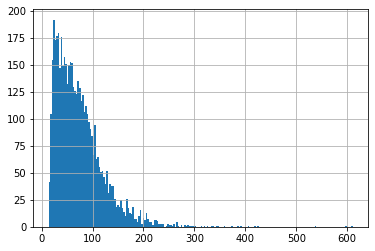

In [333]:
_ = simulated_vot_values[simulated_vot_values['VOT CAR'] != 0]['VOT CAR'].hist(bins=200)

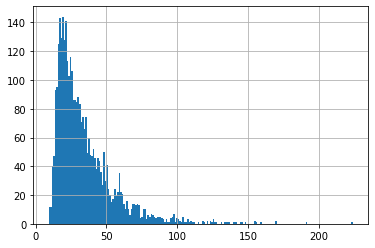

In [334]:

_ = simulated_vot_values[simulated_vot_values['VOT PT'] != 0]['VOT PT'].hist(bins=200)

In [335]:
avg_vot_pt = (
    simulated_vot_values['VOT PT'] * 
    simulated_vot_values['Weight']
).sum() / simulated_vot_values['Weight'].sum()
print(f'Average value of time for PT: {avg_vot_pt:.3g} CHF/hour')

Average value of time for PT: 23.4 CHF/hour


In [330]:
avg_vot_car = (
    simulated_vot_values['VOT CAR'] * 
    simulated_vot_values['Weight']
).sum() / simulated_vot_values['Weight'].sum()
print(f'Average value of time for car: {avg_vot_car:.3g} CHF/hour')

Average value of time for car: 74.1 CHF/hour


**Question 5**

In [339]:
 #Choice proba:
prob_drive = exp(v_drive_model3) /( exp(v_walk_model3)+ exp(v_drive_model3)+exp(v_pt_model3)+exp(v_cycle_model3))
prob_pt =  exp(v_pt_model3) /( exp(v_walk_model3)+ exp(v_drive_model3)+exp(v_pt_model3)+exp(v_cycle_model3))

In [364]:
#Direct point elasticity of car cost
direct_elas_drive_cost= (Derive(prob_drive,'cost_drive')*cost_drive/prob_drive) 
#Direct point elasticity of public transportation cost 
direct_elas_pt_cost=(Derive(prob_pt,'cost_transit')*cost_pt/prob_pt)
#Cross point elasticity
cross_elas_drive_walk = Derive(prob_walk,'cost_drive') * cost_drive / prob_walk 
cross_elas_drive_pt = Derive(prob_pt,'cost_drive') * cost_drive / prob_pt
cross_elas_drive_cycle = Derive(prob_cycle,'cost_drive') * cost_drive / prob_cycle 
cross_elas_pt_walk = Derive(prob_walk,'cost_transit') * cost_pt / prob_walk 
cross_elas_pt_drive = Derive(prob_drive,'cost_transit') * cost_pt / prob_drive
cross_elas_pt_cycle = Derive(prob_cycle,'cost_transit') * cost_pt / prob_cycle 

In [376]:

#Simulate
simulate_elast={
    'Weight': Weight,
    'Prob DRIVE': prob_drive,
    'Prob PT': prob_pt,
    'Prob walk' : prob_walk,
    'Prob cycle' : prob_cycle,
    'direct_elas_drive_cost':direct_elas_drive_cost,
    'direct_elas_pt_cost':direct_elas_pt_cost,
    'cross_elas_drive_walk':cross_elas_drive_walk,
    'cross_elas_drive_pt':cross_elas_drive_pt,
    'cross_elas_drive_cycle' : cross_elas_drive_cycle,
    'cross_elas_pt_walk' : cross_elas_pt_walk,
    'cross_elas_pt_drive' : cross_elas_pt_drive,
    'cross_elas_pt_cycle': cross_elas_pt_cycle
}

In [377]:
biosim = bio.BIOGEME(database, simulate_elast)
simulated_values_elast = biosim.simulate(results_model3.getBetaValues())  

In [378]:
simulated_values_elast.iloc[0]

Weight                    0.879505
Prob DRIVE                0.231612
Prob PT                   0.756383
Prob walk                 0.001361
Prob cycle                0.010644
direct_elas_drive_cost   -0.165292
direct_elas_pt_cost      -0.063909
cross_elas_drive_walk     0.049823
cross_elas_drive_pt       0.049823
cross_elas_drive_cycle    0.049823
cross_elas_pt_walk        0.198427
cross_elas_pt_drive       0.198427
cross_elas_pt_cycle       0.198427
Name: 0, dtype: float64

In [381]:
#Aggregations numerator/denominator
simulated_values_elast['denominator_pt'] = (
    simulated_values_elast['Weight'] *
    simulated_values_elast['Prob PT']
)
simulated_values_elast['denominator_drive'] = (
    simulated_values_elast['Weight'] *
    simulated_values_elast['Prob DRIVE']
)
#direct
simulated_values_elast['numerator_pt_dir']=(
    simulated_values_elast['Weight'] *
    simulated_values_elast['Prob PT']*
    simulated_values_elast['direct_elas_pt_cost']
)
simulated_values_elast['numerator_drive_dir']=(
    simulated_values_elast['Weight'] *
    simulated_values_elast['Prob DRIVE']*
    simulated_values_elast['direct_elas_drive_cost'])
#cross
simulated_values_elast['numerator_drive_walk']=(
    simulated_values_elast['Weight'] *
    simulated_values_elast['Prob DRIVE']*
    simulated_values_elast['cross_elas_drive_walk']
)
simulated_values_elast['numerator_drive_pt']=(
    simulated_values_elast['Weight'] *
    simulated_values_elast['Prob PT']*
    simulated_values_elast['cross_elas_drive_pt']
)
simulated_values_elast['numerator_drive_cycle']=(
    simulated_values_elast['Weight'] *
    simulated_values_elast['Prob cycle']*
    simulated_values_elast['cross_elas_drive_cycle']
)
simulated_values_elast['numerator_pt_cycle']=(
    simulated_values_elast['Weight'] *
    simulated_values_elast['Prob cycle']*
    simulated_values_elast['cross_elas_pt_cycle']
)
simulated_values_elast['numerator_pt_walk']=(
    simulated_values_elast['Weight'] *
    simulated_values_elast['Prob walk']*
    simulated_values_elast['cross_elas_pt_walk']
)
simulated_values_elast['numerator_pt_drive']=(
    simulated_values_elast['Weight'] *
    simulated_values_elast['Prob DRIVE']*
    simulated_values_elast['cross_elas_pt_drive']
)

In [391]:
#Aggregation
agg_direct_elas_pt_cost=simulated_values_elast['numerator_pt_dir'].sum()/simulated_values_elast['denominator_pt'].sum()
agg_direct_elas_drive_cost=simulated_values_elast['numerator_drive_dir'].sum()/simulated_values_elast['denominator_drive'].sum()
agg_cross_elas_drive_pt=simulated_values_elast['numerator_drive_pt'].sum()/simulated_values_elast['denominator_drive'].sum()
agg_cross_elas_pt_walk=simulated_values_elast['numerator_pt_walk'].sum()/simulated_values_elast['denominator_pt'].sum()
agg_cross_elas_pt_drive=simulated_values_elast['numerator_pt_drive'].sum()/simulated_values_elast['denominator_pt'].sum()
agg_cross_elas_pt_cycle=simulated_values_elast['numerator_pt_cycle'].sum()/simulated_values_elast['denominator_pt'].sum()
agg_cross_elas_drive_walk=simulated_values_elast['numerator_drive_walk'].sum()/simulated_values_elast['denominator_pt'].sum()
agg_cross_elas_drive_cycle=simulated_values_elast['numerator_drive_cycle'].sum()/simulated_values_elast['denominator_pt'].sum()

In [394]:
print('denominator pt',simulated_values_elast['denominator_pt'].sum())
print('denominator drive',simulated_values_elast['denominator_drive'].sum())
print('agg_direct_elas_pt_cost',agg_direct_elas_pt_cost)
print('agg_direct_elas_drive_cost',agg_direct_elas_drive_cost)
print('agg_cross_elas_drive_pt',agg_cross_elas_drive_pt)
print('agg_cross_elas_pt_walk',agg_cross_elas_pt_walk)
print('agg_cross_elas_pt_drive',agg_cross_elas_pt_drive)
print('agg_cross_elas_pt_cycle',agg_cross_elas_pt_cycle)
print('agg_cross_elas_drive_walk',agg_cross_elas_drive_walk)
print('agg_cross_elas_drive_cycle',agg_cross_elas_drive_cycle)

denominator pt 1810.1952771512779
denominator drive 2147.5257927035937
agg_direct_elas_pt_cost -0.12731195427781558
agg_direct_elas_drive_cost -0.08574203921750838
agg_cross_elas_drive_pt 0.07195238513941418
agg_cross_elas_pt_walk 0.013499022724244752
agg_cross_elas_pt_drive 0.10357481513265218
agg_cross_elas_pt_cycle 0.010238116420918649
agg_cross_elas_drive_walk 0.08891408695457778
agg_cross_elas_drive_cycle 0.0062123196649545125
